In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## First dataframe of monthly consumption data of year 2021 by countries

In [4]:
df1 = pd.read_excel(r"C:\Users\Aman\Desktop\pecfdataset\monthly_hourly_load_values_2021.xlsx")

In [5]:
df1.head()

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,UpdateDate
0,Monthly Hourly Load Values,2021-08-10 00:00:00,2021-08-10,00:00:00,01:00:00,AL,100,125.0,125.0,2023-04-12 11:44:00
1,Monthly Hourly Load Values,2021-08-10 01:00:00,2021-08-10,01:00:00,02:00:00,AL,100,125.0,125.0,2023-04-12 11:44:00
2,Monthly Hourly Load Values,2021-08-10 02:00:00,2021-08-10,02:00:00,03:00:00,AL,100,125.0,125.0,2023-04-12 11:44:00
3,Monthly Hourly Load Values,2021-08-10 03:00:00,2021-08-10,03:00:00,04:00:00,AL,100,125.0,125.0,2023-04-12 11:44:00
4,Monthly Hourly Load Values,2021-08-10 04:00:00,2021-08-10,04:00:00,05:00:00,AL,100,125.0,125.0,2023-04-12 11:44:00


In [7]:
df1.rename(columns ={"DateShort":"Date","TimeFrom":"Time",},inplace=True)

In [10]:
df1.drop(columns = ["MeasureItem","DateUTC","TimeTo","Cov_ratio","Value_ScaleTo100","UpdateDate"],inplace=True)
df1

,Date,Time,CountryCode,Value
0,2021-08-10,00:00:00,AL,125.00
1,2021-08-10,01:00:00,AL,125.00
2,2021-08-10,02:00:00,AL,125.00
3,2021-08-10,03:00:00,AL,125.00
4,2021-08-10,04:00:00,AL,125.00
...,...,...,...,...
307042,2021-12-31,19:00:00,XK,1173.09
307043,2021-12-31,20:00:00,XK,1089.00
307044,2021-12-31,21:00:00,XK,1069.86
307045,2021-12-31,22:00:00,XK,1071.05


In [11]:
df1.shape

(307047, 4)

In [13]:
distinct_count = df1['Date'].nunique()
print(distinct_count)
distinct_values = df1['CountryCode'].unique()

print(distinct_values)

365
['AL' 'AT' 'BA' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR'
 'GB' 'GR' 'GE' 'HR' 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MD' 'ME' 'MK' 'NL'
 'NO' 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'UA' 'XK']


In [15]:
value_counts = df1['CountryCode'].value_counts()

# Find the element(s) with a total count of 8760
element_with_count_8760 = value_counts[value_counts == 8760].index.tolist()

print("Element(s) with a total count of 8760:", element_with_count_8760)

Element(s) with a total count of 8760: ['HR', 'SK', 'SE', 'RS', 'PT', 'PL', 'NL', 'ME', 'LU', 'LT', 'IT', 'AT', 'HU', 'SI', 'CH', 'FI', 'DK', 'DE', 'BE', 'CZ', 'BG']


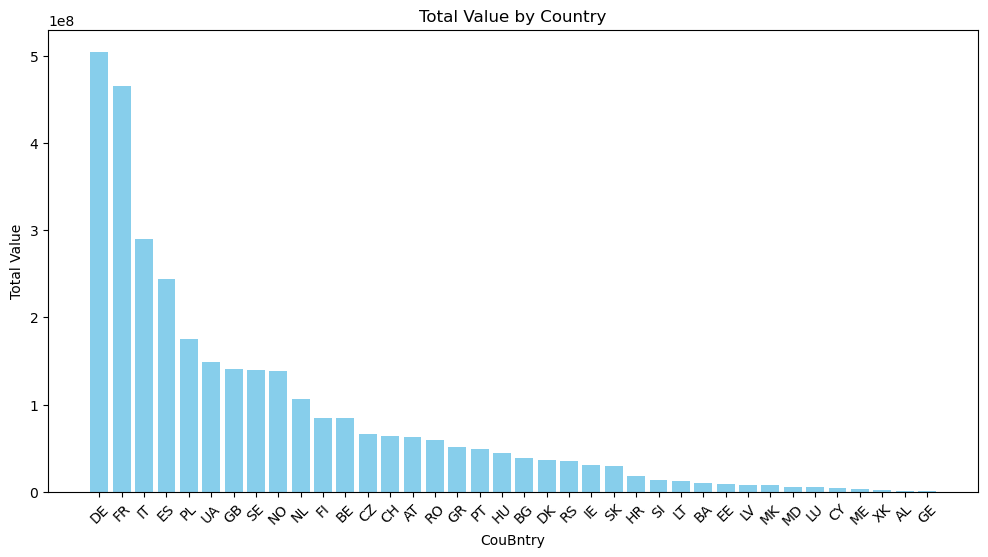

In [16]:
country_totals = df1.groupby('CountryCode')['Value'].sum().reset_index()

# Sort the countries by total value in descending order
country_totals = country_totals.sort_values(by='Value', ascending=False)

# Plot the results in a bar graph
plt.figure(figsize=(12, 6))
plt.bar(country_totals['CountryCode'], country_totals['Value'], color='skyblue')
plt.xlabel('CouBntry')
plt.ylabel('Total Value')
plt.title('Total Value by Country')
plt.xticks(rotation=45)
plt.show()

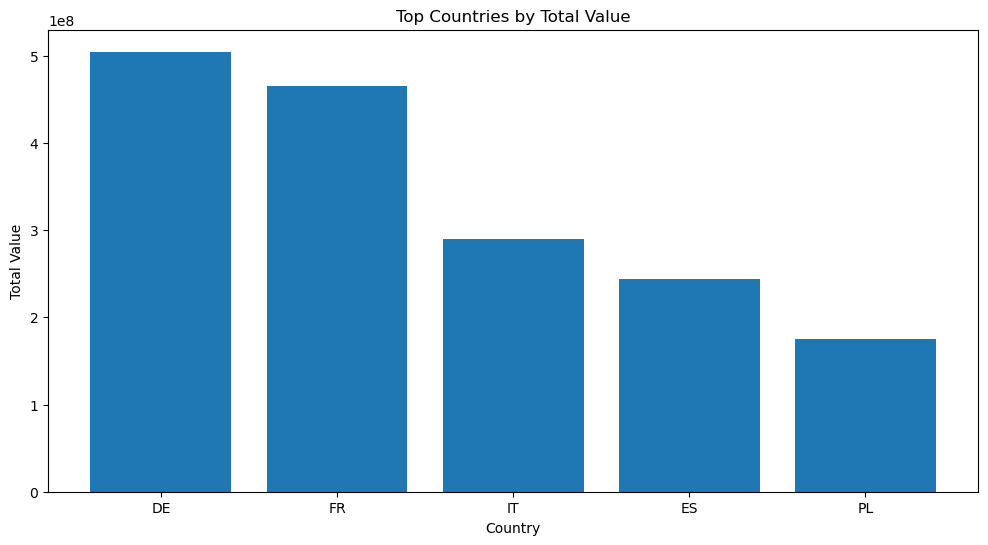

Countries with a total value of 8760:
Empty DataFrame
Columns: [CountryCode, Value]
Index: []


In [19]:
value_counts = df1['CountryCode'].value_counts()

# Find the element(s) with a total count of 8760
element_with_count_8760 = value_counts[value_counts == 8760].index.tolist()







country_totals = df1.groupby('CountryCode')['Value'].sum().reset_index()

# Filter out countries with a total value of 8760
element_with_count_8760 = country_totals[country_totals['Value'] == 8760]

# Plot a bar graph of countries with maximum total value
top_countries = country_totals.nlargest(5, 'Value')  # Get top 5 countries with maximum total value
plt.figure(figsize=(12, 6))
plt.bar(top_countries['CountryCode'], top_countries['Value'])
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Top Countries by Total Value')
plt.show()

# Print countries with a total value of 8760
print("Countries with a total value of 8760:")
print(element_with_count_8760)

In [21]:
df1["Value"].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
307042    False
307043    False
307044    False
307045    False
307046    False
Name: Value, Length: 307047, dtype: bool

In [22]:
distinct_count = df1['CountryCode'].nunique()
print(distinct_count)
distinct_values = df1['CountryCode'].unique()

print(distinct_values)

38
['AL' 'AT' 'BA' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR'
 'GB' 'GR' 'GE' 'HR' 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MD' 'ME' 'MK' 'NL'
 'NO' 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'UA' 'XK']


In [25]:
df1=df1[df1['CountryCode'] == 'DE'].copy()

In [26]:
df1.head()

,Date,Time,CountryCode,Value
62705,2021-01-01,00:00:00,DE,42832.3525
62706,2021-01-01,01:00:00,DE,41111.0725
62707,2021-01-01,02:00:00,DE,40364.5550
62708,2021-01-01,03:00:00,DE,40318.0775
62709,2021-01-01,04:00:00,DE,39641.9450


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 62705 to 71464
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8760 non-null   datetime64[ns]
 1   Time         8760 non-null   object        
 2   CountryCode  8760 non-null   object        
 3   Value        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 342.2+ KB


### Second dataframe of monthly energy consumption of data by each country

In [34]:
df2=pd.read_excel(r"C:\Users\Aman\Desktop\pecfdataset\monthly_hourly_load_values_2022.xlsx")

In [35]:
df2.head()

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,CreateDate
0,Monthly Hourly Load Values,2022-01-01 23:00:00,2022-01-01,1970-01-01 23:00:00,1970-01-01 00:00:00,AL,100,166.0,166.0,2023-06-07 15:31:00.977
1,Monthly Hourly Load Values,2022-01-02 00:00:00,2022-01-02,1970-01-01 00:00:00,1970-01-01 01:00:00,AL,100,144.0,144.0,2023-06-07 15:31:00.977
2,Monthly Hourly Load Values,2022-01-02 01:00:00,2022-01-02,1970-01-01 01:00:00,1970-01-01 02:00:00,AL,100,129.0,129.0,2023-06-07 15:31:00.977
3,Monthly Hourly Load Values,2022-01-02 02:00:00,2022-01-02,1970-01-01 02:00:00,1970-01-01 03:00:00,AL,100,123.0,123.0,2023-06-07 15:31:00.977
4,Monthly Hourly Load Values,2022-01-02 03:00:00,2022-01-02,1970-01-01 03:00:00,1970-01-01 04:00:00,AL,100,122.0,122.0,2023-06-07 15:31:00.977


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299310 entries, 0 to 299309
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   MeasureItem       299310 non-null  object        
 1   DateUTC           299310 non-null  datetime64[ns]
 2   DateShort         299310 non-null  datetime64[ns]
 3   TimeFrom          299310 non-null  datetime64[ns]
 4   TimeTo            299310 non-null  datetime64[ns]
 5   CountryCode       299310 non-null  object        
 6   Cov_ratio         299310 non-null  int64         
 7   Value             299310 non-null  float64       
 8   Value_ScaleTo100  299310 non-null  float64       
 9   CreateDate        299310 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(1), object(2)
memory usage: 22.8+ MB


In [37]:
df2['date'] = df2['TimeFrom'].dt.date
df2['time'] = df2['TimeFrom'].dt.time

In [38]:
df2.head()

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,CreateDate,date,time
0,Monthly Hourly Load Values,2022-01-01 23:00:00,2022-01-01,1970-01-01 23:00:00,1970-01-01 00:00:00,AL,100,166.0,166.0,2023-06-07 15:31:00.977,1970-01-01,23:00:00
1,Monthly Hourly Load Values,2022-01-02 00:00:00,2022-01-02,1970-01-01 00:00:00,1970-01-01 01:00:00,AL,100,144.0,144.0,2023-06-07 15:31:00.977,1970-01-01,00:00:00
2,Monthly Hourly Load Values,2022-01-02 01:00:00,2022-01-02,1970-01-01 01:00:00,1970-01-01 02:00:00,AL,100,129.0,129.0,2023-06-07 15:31:00.977,1970-01-01,01:00:00
3,Monthly Hourly Load Values,2022-01-02 02:00:00,2022-01-02,1970-01-01 02:00:00,1970-01-01 03:00:00,AL,100,123.0,123.0,2023-06-07 15:31:00.977,1970-01-01,02:00:00
4,Monthly Hourly Load Values,2022-01-02 03:00:00,2022-01-02,1970-01-01 03:00:00,1970-01-01 04:00:00,AL,100,122.0,122.0,2023-06-07 15:31:00.977,1970-01-01,03:00:00


In [42]:
df2=df2.drop(columns=["MeasureItem","DateUTC","TimeTo","Cov_ratio","TimeFrom","Value_ScaleTo100","CreateDate","date"])

In [54]:
df2=df2.rename(columns={"DateShort":"Date","time":"Time"})

In [55]:
df2.shape

(299310, 4)

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299310 entries, 0 to 299309
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         299310 non-null  datetime64[ns]
 1   CountryCode  299310 non-null  object        
 2   Value        299310 non-null  float64       
 3   Time         299310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.1+ MB


In [57]:
distinct_count = df2['Date'].nunique()
print(distinct_count)
distinct_values = df2['CountryCode'].unique()

print(distinct_values)

365
['AL' 'AT' 'BA' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR'
 'GE' 'GR' 'HR' 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MD' 'ME' 'MK' 'NL' 'NO'
 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'UA' 'XK']


In [58]:
value_counts = df2['CountryCode'].value_counts()

# Find the element(s) with a total count of 8760
element_with_count_8760 = value_counts[value_counts == 8760].index.tolist()

print("Element(s) with a total count of 8760:", element_with_count_8760)

Element(s) with a total count of 8760: ['XK', 'SE', 'PT', 'PL', 'NO', 'NL', 'MK', 'ME', 'LV', 'LU', 'IT', 'AT', 'HU', 'HR', 'FI', 'ES', 'DK', 'DE', 'CH', 'BG', 'BE']


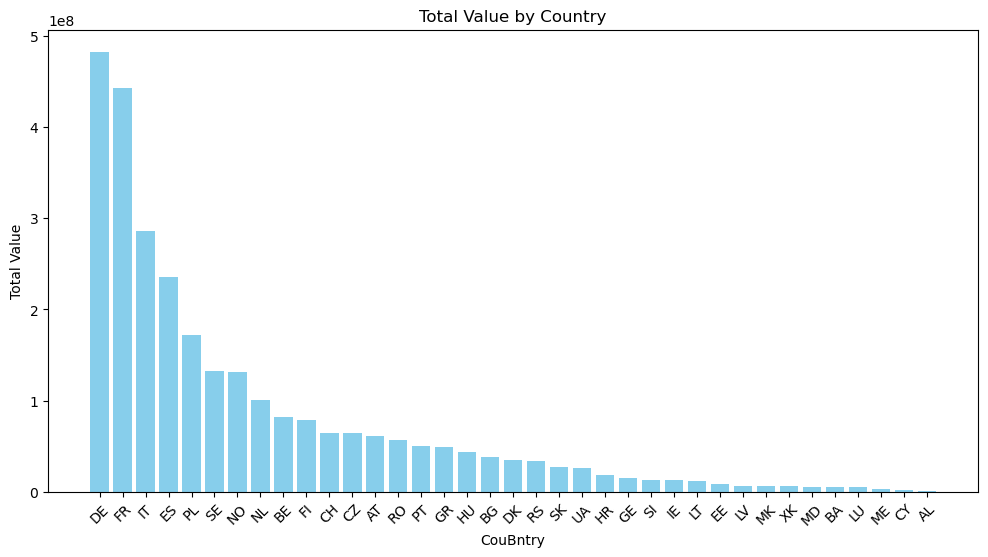

In [59]:
country_totals = df2.groupby('CountryCode')['Value'].sum().reset_index()

# Sort the countries by total value in descending order
country_totals = country_totals.sort_values(by='Value', ascending=False)

# Plot the results in a bar graph
plt.figure(figsize=(12, 6))
plt.bar(country_totals['CountryCode'], country_totals['Value'], color='skyblue')
plt.xlabel('CouBntry')
plt.ylabel('Total Value')
plt.title('Total Value by Country')
plt.xticks(rotation=45)
plt.show()

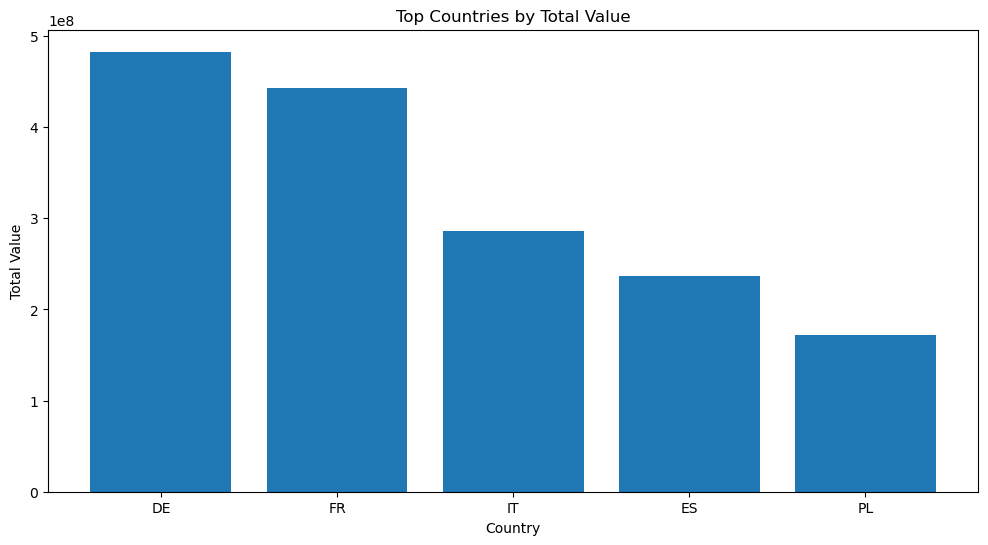

Countries with a total value of 8760:
Empty DataFrame
Columns: [CountryCode, Value]
Index: []


In [60]:
value_counts = df2['CountryCode'].value_counts()

# Find the element(s) with a total count of 8760
element_with_count_8760 = value_counts[value_counts == 8760].index.tolist()







country_totals = df2.groupby('CountryCode')['Value'].sum().reset_index()

# Filter out countries with a total value of 8760
element_with_count_8760 = country_totals[country_totals['Value'] == 8760]

# Plot a bar graph of countries with maximum total value
top_countries = country_totals.nlargest(5, 'Value')  # Get top 5 countries with maximum total value
plt.figure(figsize=(12, 6))
plt.bar(top_countries['CountryCode'], top_countries['Value'])
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Top Countries by Total Value')
plt.show()

# Print countries with a total value of 8760
print("Countries with a total value of 8760:")
print(element_with_count_8760)

In [61]:
df2["Value"].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
299305    False
299306    False
299307    False
299308    False
299309    False
Name: Value, Length: 299310, dtype: bool

In [62]:
df2.shape

(299310, 4)

In [63]:
df2=df2[df2['CountryCode'] == 'DE'].copy()

In [64]:
df2.shape

(8760, 4)

In [65]:
df2.head()

,Date,CountryCode,Value,Time
58336,2022-01-01,DE,41535.7650,00:00:00
58337,2022-01-01,DE,40480.9050,01:00:00
58338,2022-01-01,DE,39563.9150,02:00:00
58339,2022-01-01,DE,39338.1950,03:00:00
58340,2022-01-01,DE,38826.6425,04:00:00


In [66]:
df2.tail()

,Date,CountryCode,Value,Time
67091,2022-12-31,DE,46745.0600,19:00:00
67092,2022-12-31,DE,44272.5775,20:00:00
67093,2022-12-31,DE,42715.8200,21:00:00
67094,2022-12-31,DE,40995.7250,22:00:00
67095,2022-12-31,DE,38536.4825,23:00:00


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 58336 to 67095
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8760 non-null   datetime64[ns]
 1   CountryCode  8760 non-null   object        
 2   Value        8760 non-null   float64       
 3   Time         8760 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 342.2+ KB


### Third data frame of monthly energy consumption by countries 

In [82]:
df3 = pd.read_csv(r"C:\Users\Aman\Desktop\pecfdataset\monthly_hourly_load_values_2023.csv")

In [83]:
df3.head()

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100,UpdateDate
0,Monthly Hourly Load Values,01/01/2023 00:00,01/01/2023,00:00,01:00,AL,100,161.0,161.0,01/03/2024 12:09
1,Monthly Hourly Load Values,01/01/2023 01:00,01/01/2023,01:00,02:00,AL,100,138.0,138.0,01/03/2024 12:09
2,Monthly Hourly Load Values,01/01/2023 02:00,01/01/2023,02:00,03:00,AL,100,124.0,124.0,01/03/2024 12:09
3,Monthly Hourly Load Values,01/01/2023 03:00,01/01/2023,03:00,04:00,AL,100,119.0,119.0,01/03/2024 12:09
4,Monthly Hourly Load Values,01/01/2023 04:00,01/01/2023,04:00,05:00,AL,100,121.0,121.0,01/03/2024 12:09


In [84]:
df3.shape

(302896, 10)

In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302896 entries, 0 to 302895
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MeasureItem       302896 non-null  object 
 1   DateUTC           302896 non-null  object 
 2   DateShort         302896 non-null  object 
 3   TimeFrom          302896 non-null  object 
 4   TimeTo            302896 non-null  object 
 5   CountryCode       302896 non-null  object 
 6   Cov_ratio         302896 non-null  int64  
 7   Value             302896 non-null  float64
 8   Value_ScaleTo100  302896 non-null  float64
 9   UpdateDate        302896 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 23.1+ MB


In [86]:
df3 = df3.drop(columns=["MeasureItem","DateUTC","TimeTo","Cov_ratio","Value_ScaleTo100","UpdateDate"])

In [87]:
df3.head()

,DateShort,TimeFrom,CountryCode,Value
0,01/01/2023,00:00,AL,161.0
1,01/01/2023,01:00,AL,138.0
2,01/01/2023,02:00,AL,124.0
3,01/01/2023,03:00,AL,119.0
4,01/01/2023,04:00,AL,121.0


In [88]:
df3['DateShort'] = pd.to_datetime(df3['DateShort'], format='%d/%m/%Y')

In [89]:
df3['TimeFrom'] = pd.to_datetime(df3['TimeFrom'], format='%H:%M').dt.strftime('%H:%M:%S')
df3.head()

,DateShort,TimeFrom,CountryCode,Value
0,2023-01-01,00:00:00,AL,161.0
1,2023-01-01,01:00:00,AL,138.0
2,2023-01-01,02:00:00,AL,124.0
3,2023-01-01,03:00:00,AL,119.0
4,2023-01-01,04:00:00,AL,121.0


In [90]:
df3 = df3.rename(columns={"DateShort":"Date","TimeFrom":"Time"})

In [92]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302896 entries, 0 to 302895
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         302896 non-null  datetime64[ns]
 1   Time         302896 non-null  object        
 2   CountryCode  302896 non-null  object        
 3   Value        302896 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.2+ MB


In [93]:
df3.shape

(302896, 4)

In [94]:
distinct_count = df3['Date'].nunique()
print(distinct_count)
distinct_values = df3['CountryCode'].unique()

print(distinct_values)

365
['AL' 'AT' 'BA' 'BE' 'BG' 'CH' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR' 'GB'
 'GE' 'GR' 'HR' 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MD' 'ME' 'MK' 'NL' 'NO'
 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'XK']


In [95]:
value_counts = df3['CountryCode'].value_counts()

# Find the element(s) with a total count of 8760
element_with_count_8760 = value_counts[value_counts == 8760].index.tolist()

print("Element(s) with a total count of 8760:", element_with_count_8760)

Element(s) with a total count of 8760: ['XK', 'SE', 'PT', 'PL', 'NO', 'NL', 'MK', 'ME', 'LV', 'LU', 'LT', 'IT', 'AT', 'HR', 'GR', 'FI', 'ES', 'DE', 'BG', 'BE', 'RO']


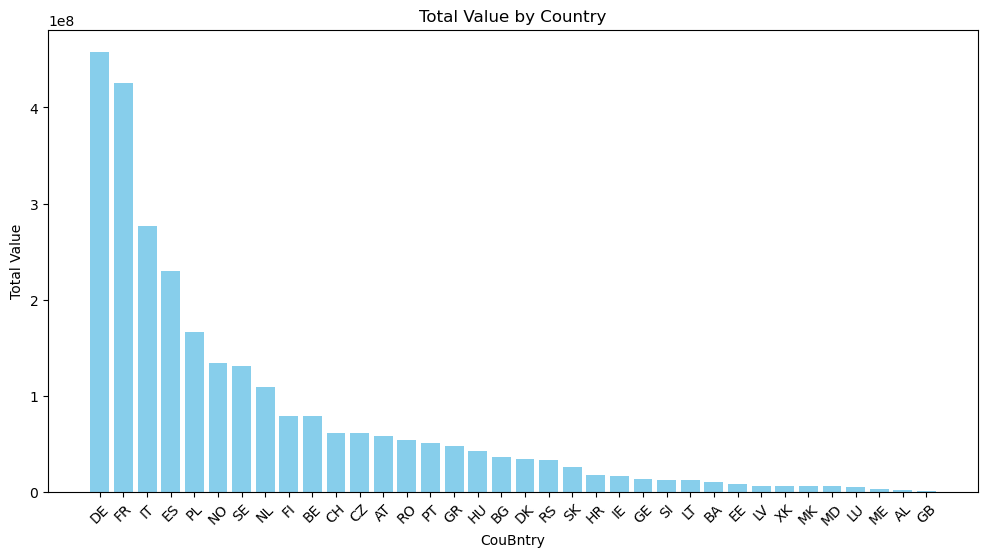

In [96]:
country_totals = df3.groupby('CountryCode')['Value'].sum().reset_index()

# Sort the countries by total value in descending order
country_totals = country_totals.sort_values(by='Value', ascending=False)

# Plot the results in a bar graph
plt.figure(figsize=(12, 6))
plt.bar(country_totals['CountryCode'], country_totals['Value'], color='skyblue')
plt.xlabel('CouBntry')
plt.ylabel('Total Value')
plt.title('Total Value by Country')
plt.xticks(rotation=45)
plt.show()

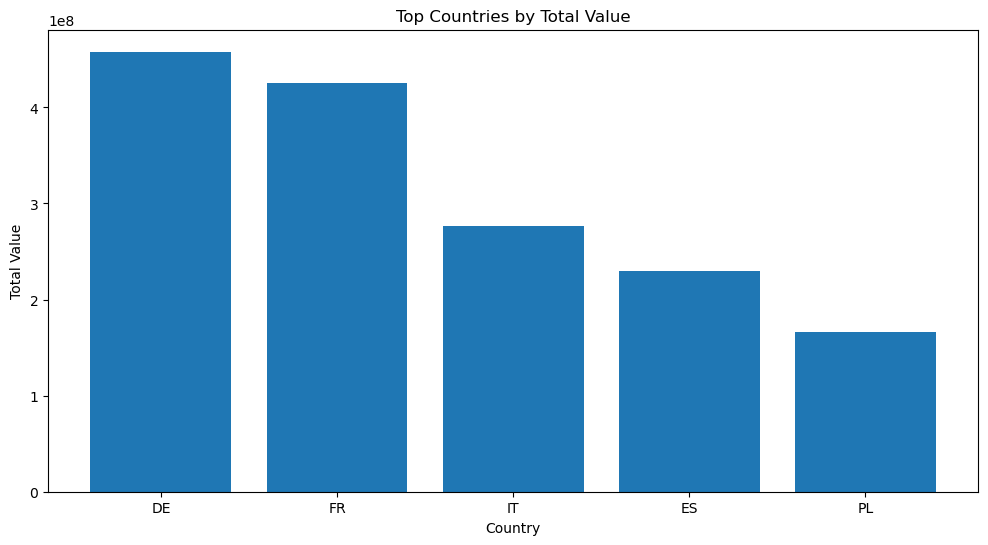

Countries with a total value of 8760:
Empty DataFrame
Columns: [CountryCode, Value]
Index: []


In [97]:
value_counts = df3['CountryCode'].value_counts()

# Find the element(s) with a total count of 8760
element_with_count_8760 = value_counts[value_counts == 8760].index.tolist()







country_totals = df3.groupby('CountryCode')['Value'].sum().reset_index()

# Filter out countries with a total value of 8760
element_with_count_8760 = country_totals[country_totals['Value'] == 8760]

# Plot a bar graph of countries with maximum total value
top_countries = country_totals.nlargest(5, 'Value')  # Get top 5 countries with maximum total value
plt.figure(figsize=(12, 6))
plt.bar(top_countries['CountryCode'], top_countries['Value'])
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Top Countries by Total Value')
plt.show()

# Print countries with a total value of 8760
print("Countries with a total value of 8760:")
print(element_with_count_8760)

In [98]:
df3["Value"].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
302891    False
302892    False
302893    False
302894    False
302895    False
Name: Value, Length: 302896, dtype: bool

In [99]:
df3 = df3[df3['CountryCode'] == 'DE'].copy()

In [100]:
df3.shape

(8760, 4)

In [101]:
df3.head()

,Date,Time,CountryCode,Value
61154,2023-01-01,00:00:00,DE,37935.2625
61155,2023-01-01,01:00:00,DE,37103.1100
61156,2023-01-01,02:00:00,DE,36139.2725
61157,2023-01-01,03:00:00,DE,35711.4450
61158,2023-01-01,04:00:00,DE,35854.0400


In [102]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 61154 to 69913
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8760 non-null   datetime64[ns]
 1   Time         8760 non-null   object        
 2   CountryCode  8760 non-null   object        
 3   Value        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 342.2+ KB


In [108]:
Odf = pd.concat([df1, df2, df3], ignore_index=True)

In [109]:
Odf.head()

,Date,Time,CountryCode,Value
0,2021-01-01,00:00:00,DE,42832.3525
1,2021-01-01,01:00:00,DE,41111.0725
2,2021-01-01,02:00:00,DE,40364.5550
3,2021-01-01,03:00:00,DE,40318.0775
4,2021-01-01,04:00:00,DE,39641.9450


In [111]:
Odf.shape

(26280, 4)

In [112]:
Odf.tail()

,Date,Time,CountryCode,Value
26275,2023-12-31,19:00:00,DE,46387.2875
26276,2023-12-31,20:00:00,DE,44212.9600
26277,2023-12-31,21:00:00,DE,43123.2575
26278,2023-12-31,22:00:00,DE,41689.4175
26279,2023-12-31,23:00:00,DE,39068.4475


In [115]:
Odf.to_csv('PECF.csv', index=False) 

## Importing final dataset to work on

In [4]:
df = pd.read_csv(r"C:\Users\Aman\Desktop\pecfdataset\PECF.csv")

In [117]:
df.shape

(26280, 4)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         26280 non-null  object 
 1   Time         26280 non-null  object 
 2   CountryCode  26280 non-null  object 
 3   Value        26280 non-null  float64
dtypes: float64(1), object(3)
memory usage: 821.4+ KB


In [121]:
df.head()

,Date,Time,CountryCode,Value
0,2021-01-01,00:00:00,DE,42832.3525
1,2021-01-01,01:00:00,DE,41111.0725
2,2021-01-01,02:00:00,DE,40364.5550
3,2021-01-01,03:00:00,DE,40318.0775
4,2021-01-01,04:00:00,DE,39641.9450


In [122]:
df.tail()

,Date,Time,CountryCode,Value
26275,2023-12-31,19:00:00,DE,46387.2875
26276,2023-12-31,20:00:00,DE,44212.9600
26277,2023-12-31,21:00:00,DE,43123.2575
26278,2023-12-31,22:00:00,DE,41689.4175
26279,2023-12-31,23:00:00,DE,39068.4475


## FEATURE ENGINEERING

In [127]:
df['Date'] = pd.to_datetime(df['Date'])

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time




In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         26280 non-null  datetime64[ns]
 1   Time         26280 non-null  object        
 2   CountryCode  26280 non-null  object        
 3   Value        26280 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 821.4+ KB


In [129]:
df.head()

,Date,Time,CountryCode,Value
0,2021-01-01,00:00:00,DE,42832.3525
1,2021-01-01,01:00:00,DE,41111.0725
2,2021-01-01,02:00:00,DE,40364.5550
3,2021-01-01,03:00:00,DE,40318.0775
4,2021-01-01,04:00:00,DE,39641.9450


In [131]:
# Create new columns for year, quarter, month, and day
df['year'] = df['Date'].apply(lambda x: x.year)
df['quarter'] = df['Date'].apply(lambda x: x.quarter)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)

In [132]:
df = df.loc[:,['Date','Value', 'year','quarter','month','day','CountryCode','Time']]

In [133]:
df.head()

,Date,Value,year,quarter,month,day,CountryCode,Time
0,2021-01-01,42832.3525,2021,1,1,1,DE,00:00:00
1,2021-01-01,41111.0725,2021,1,1,1,DE,01:00:00
2,2021-01-01,40364.5550,2021,1,1,1,DE,02:00:00
3,2021-01-01,40318.0775,2021,1,1,1,DE,03:00:00
4,2021-01-01,39641.9450,2021,1,1,1,DE,04:00:00


In [134]:
df.tail()

,Date,Value,year,quarter,month,day,CountryCode,Time
26275,2023-12-31,46387.2875,2023,4,12,31,DE,19:00:00
26276,2023-12-31,44212.9600,2023,4,12,31,DE,20:00:00
26277,2023-12-31,43123.2575,2023,4,12,31,DE,21:00:00
26278,2023-12-31,41689.4175,2023,4,12,31,DE,22:00:00
26279,2023-12-31,39068.4475,2023,4,12,31,DE,23:00:00


In [136]:
# Sort the data by date_time in ascending order
df.sort_values('Date', inplace=True, ascending=True)

In [137]:
# Reset the index of the data
df = df.reset_index(drop=True)

In [139]:
# Create a new column 'weekday' that indicates if the day is a weekday (1) or weekend (0)
df['weekday'] = df['Date'].apply(lambda x: x.weekday() < 5).astype(int)

In [141]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', df.shape)

# Print the minimum and maximum date_time values
print('Minimum date_time:', df.Date.min())
print('Maximum date_time:', df.Date.max())

# Display the last 5 rows of the data
df.tail(5)

Number of rows and columns: (26280, 9)
Minimum date_time: 2021-01-01 00:00:00
Maximum date_time: 2023-12-31 00:00:00


,Date,Value,year,quarter,month,day,CountryCode,Time,weekday
26275,2023-12-31,35498.9775,2023,4,12,31,DE,01:00:00,0
26276,2023-12-31,36803.9000,2023,4,12,31,DE,00:00:00,0
26277,2023-12-31,41689.4175,2023,4,12,31,DE,22:00:00,0
26278,2023-12-31,48301.2175,2023,4,12,31,DE,10:00:00,0
26279,2023-12-31,39068.4475,2023,4,12,31,DE,23:00:00,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         26280 non-null  datetime64[ns]
 1   Value        26280 non-null  float64       
 2   year         26280 non-null  int64         
 3   quarter      26280 non-null  int64         
 4   month        26280 non-null  int64         
 5   day          26280 non-null  int64         
 6   CountryCode  26280 non-null  object        
 7   Time         26280 non-null  object        
 8   weekday      26280 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(2)
memory usage: 1.7+ MB


## Testing for Normality of the Global Active Power Data

Testing for Normality

We will use D’Agostino’s K^2 Test to determine if our data is normally distributed. In the SciPy implementation of the test, the p-value will be used to make the following interpretation:

If p <= alpha, we will reject the null hypothesis (H0) and conclude that the data is not normally distributed.
If p > alpha, we will fail to reject the null hypothesis and conclude that the data is normal.

In [144]:
!pip install stats

In [145]:
# Test for Normality of the Global Active Power Data

# Import the required libraries
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(df.Value)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=2837.999, p=0.000
Data does not look Gaussian (reject H0)


C:\Users\Aman\AppData\Local\Temp\ipykernel_13656\1487780109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Value,color='purple')


Kurtosis of normal distribution: -0.8492990842821215
Skewness of normal distribution: 0.05890539588408357


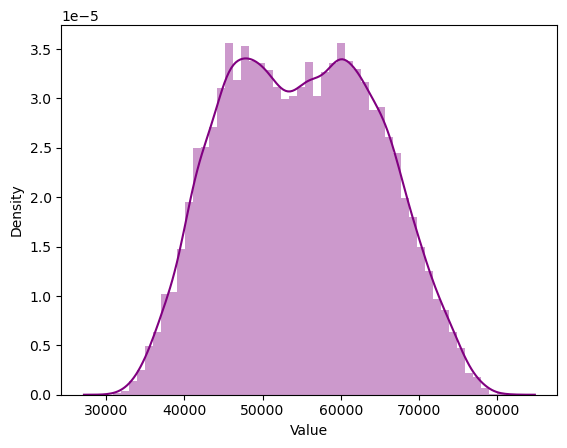

In [150]:
sns.distplot(df.Value,color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Value)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Value)))

The kurtosis value of -0.8493 indicates that the distribution is platykurtic, meaning it has thinner tails and a flatter peak compared to a normal distribution. The negative value suggests that the distribution is less peaked than a normal distribution.

The skewness value of 0.0589 is close to 0, indicating that the distribution is approximately symmetric, which is expected for a normal distribution.

# EXPLORATORY DATA ANALYSIS

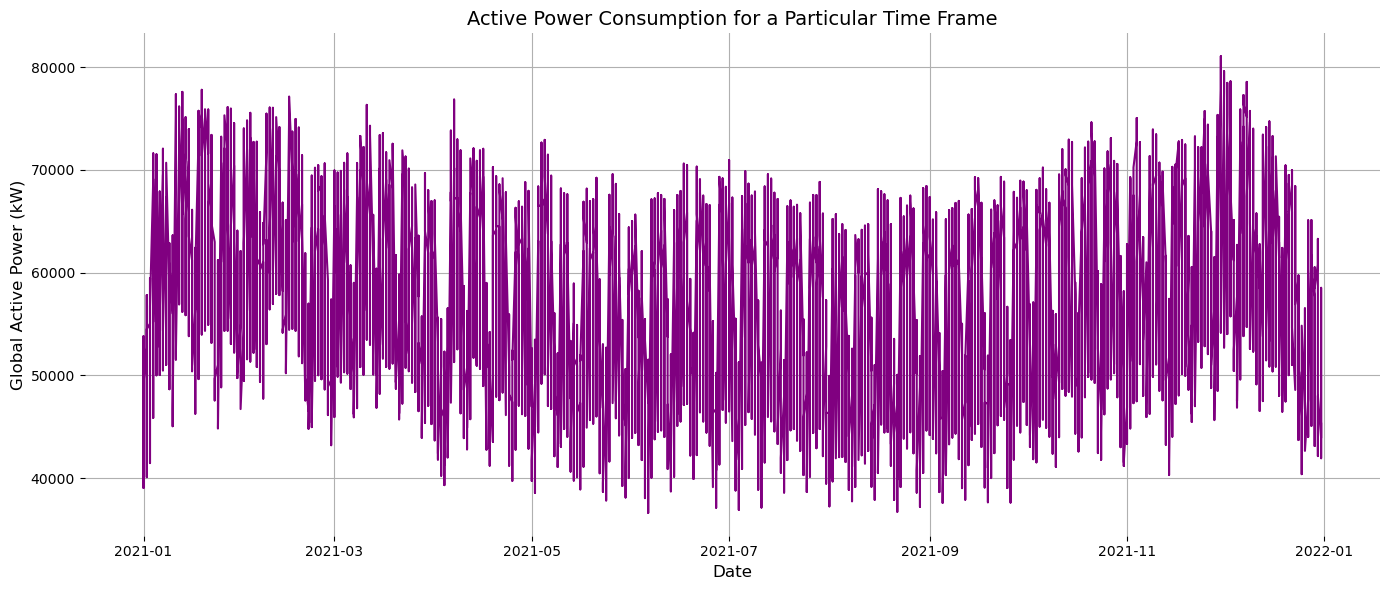

In [154]:
df1 = df[(df.Date >= '2021-01-01') & (df.Date <= '2021-12-31')]

plt.figure(figsize=(14,6))
plt.plot(df1.Date, df1.Value, color='purple')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

ValueError: Could not interpret input 'year'

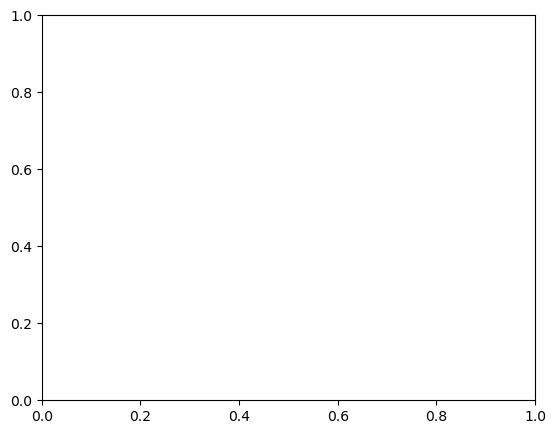

In [158]:
# Create a figure with 2 subplots
plt.figure(figsize=(14,5))

# Plot the first subplot showing the violinplot of yearly global active power
plt.subplot(1,2,1)
# Adjust the subplot's width
plt.subplots_adjust(wspace=0.2)
# Create the violinplot using Seaborn's violinplot function
sns.violinplot(x="year", y="Value", df=df, color='purple')
# Label the x-axis
plt.xlabel('Year', fontsize=12)
# Add a title to the plot
plt.title('Violin plot of Yearly Consumption', fontsize=14)
# Remove the top and right spines of the plot
sns.despine(left=True, bottom=True)
# Add a tight layout to the plot
plt.tight_layout() 

# Plot the second subplot showing the violinplot of quarterly global active power
plt.subplot(1,2,2)
# Create the violinplot using Seaborn's violinplot function
sns.violinplot(x="quarter", y="Yearly", df=df, color='purple')
# Label the x-axis
plt.xlabel('Quarter', fontsize=12)
# Add a title to the plot
plt.title('Violin plot of Quarterly Consumption', fontsize=14)
# Remove the top and right spines of the plot
sns.despine(left=True, bottom=True)
# Add a tight layout to the plot
plt.tight_layout()

          count          mean          std         min         25%  \
Value    8760.0  57593.060485  9501.556435  36618.7175  49825.5725   
year     8760.0   2021.000000     0.000000   2021.0000   2021.0000   
quarter  8760.0      2.509589     1.116831      1.0000      2.0000   
month    8760.0      6.526027     3.448048      1.0000      4.0000   
day      8760.0     15.720548     8.796749      1.0000      8.0000   
weekday  8760.0      0.715068     0.451408      0.0000      0.0000   

                 50%           75%        max  
Value    57517.90625  65432.331875  81077.455  
year      2021.00000   2021.000000   2021.000  
quarter      3.00000      4.000000      4.000  
month        7.00000     10.000000     12.000  
day         16.00000     23.000000     31.000  
weekday      1.00000      1.000000      1.000  


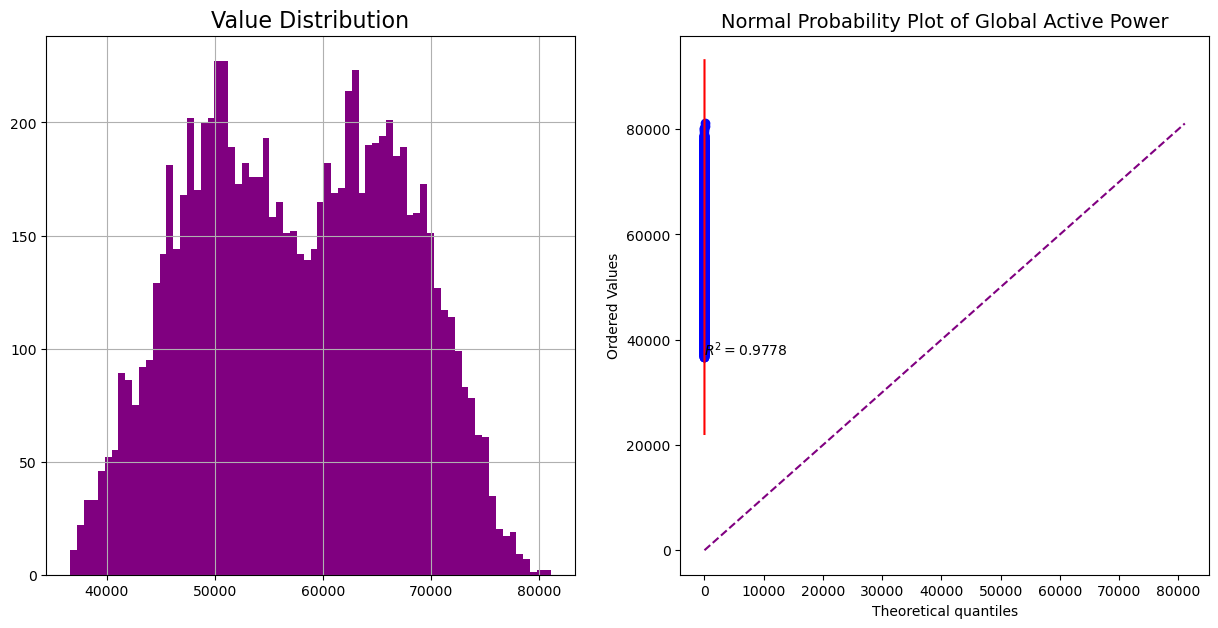

In [162]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
df1['Value'].hist(bins=70, color='purple')
plt.title('Value Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(df1['Value'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(df1['Value'])], [0, max(df1['Value'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(df1.describe().T)

In [163]:
df2=df.loc[:,['Date','Value']]
df2.set_index('Date',inplace=True)

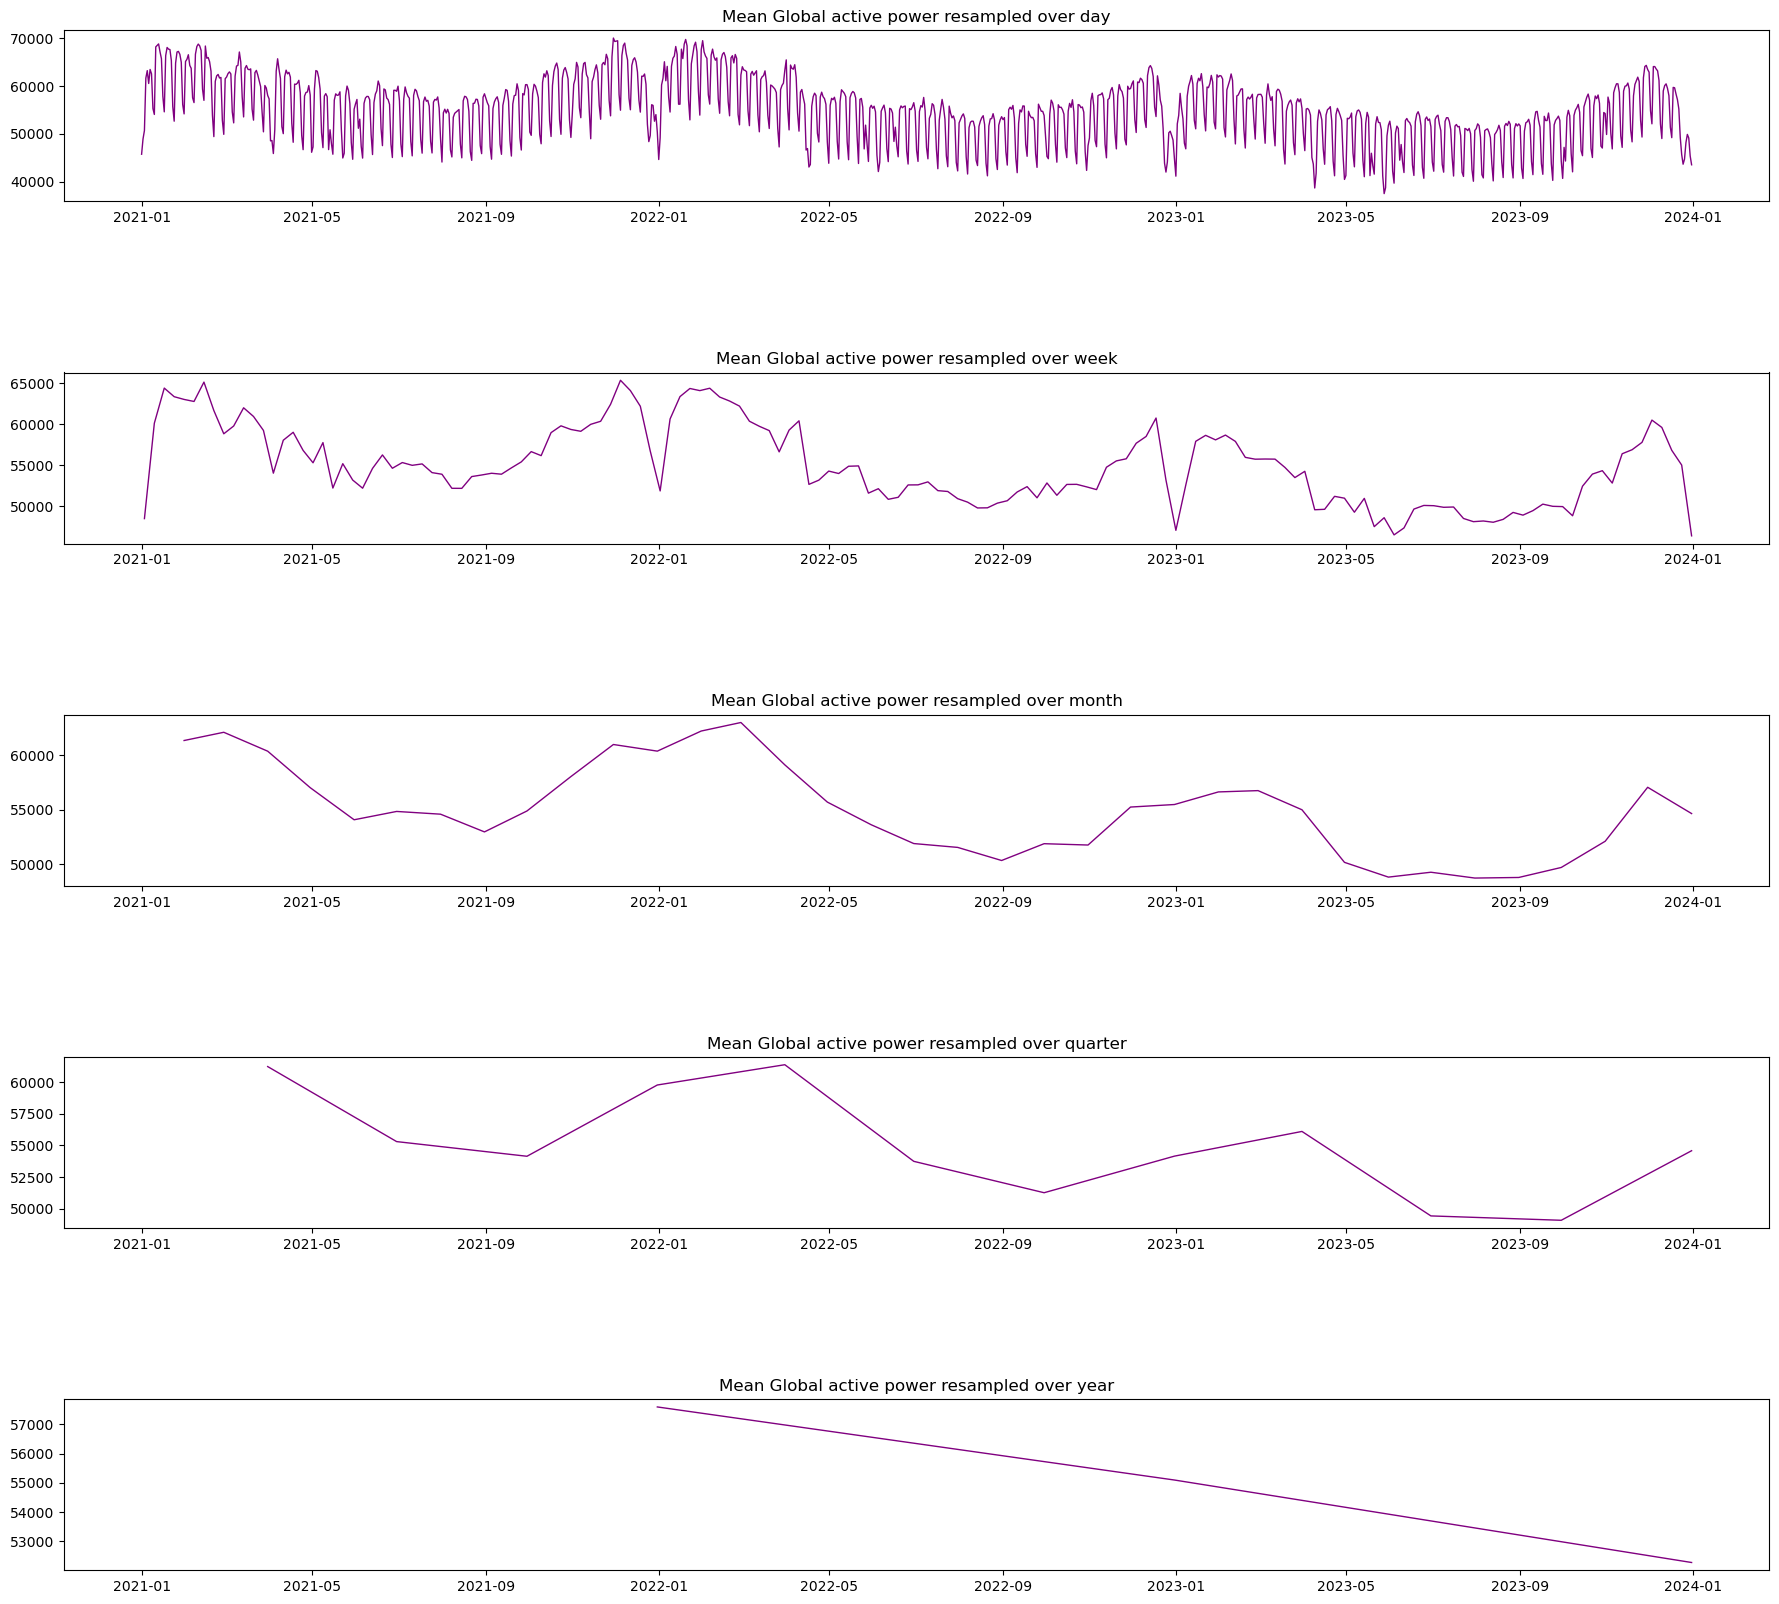

In [164]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(df2['Value'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(df2['Value'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')


# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(df2['Value'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(df2['Value'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(df2['Value'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

The overall trend in our time series data does not show a consistent increase or decrease.

The peak average power consumption was observed prior to 2007, but then there was a noticeable drop in 2008 and it has remained relatively stable since then.

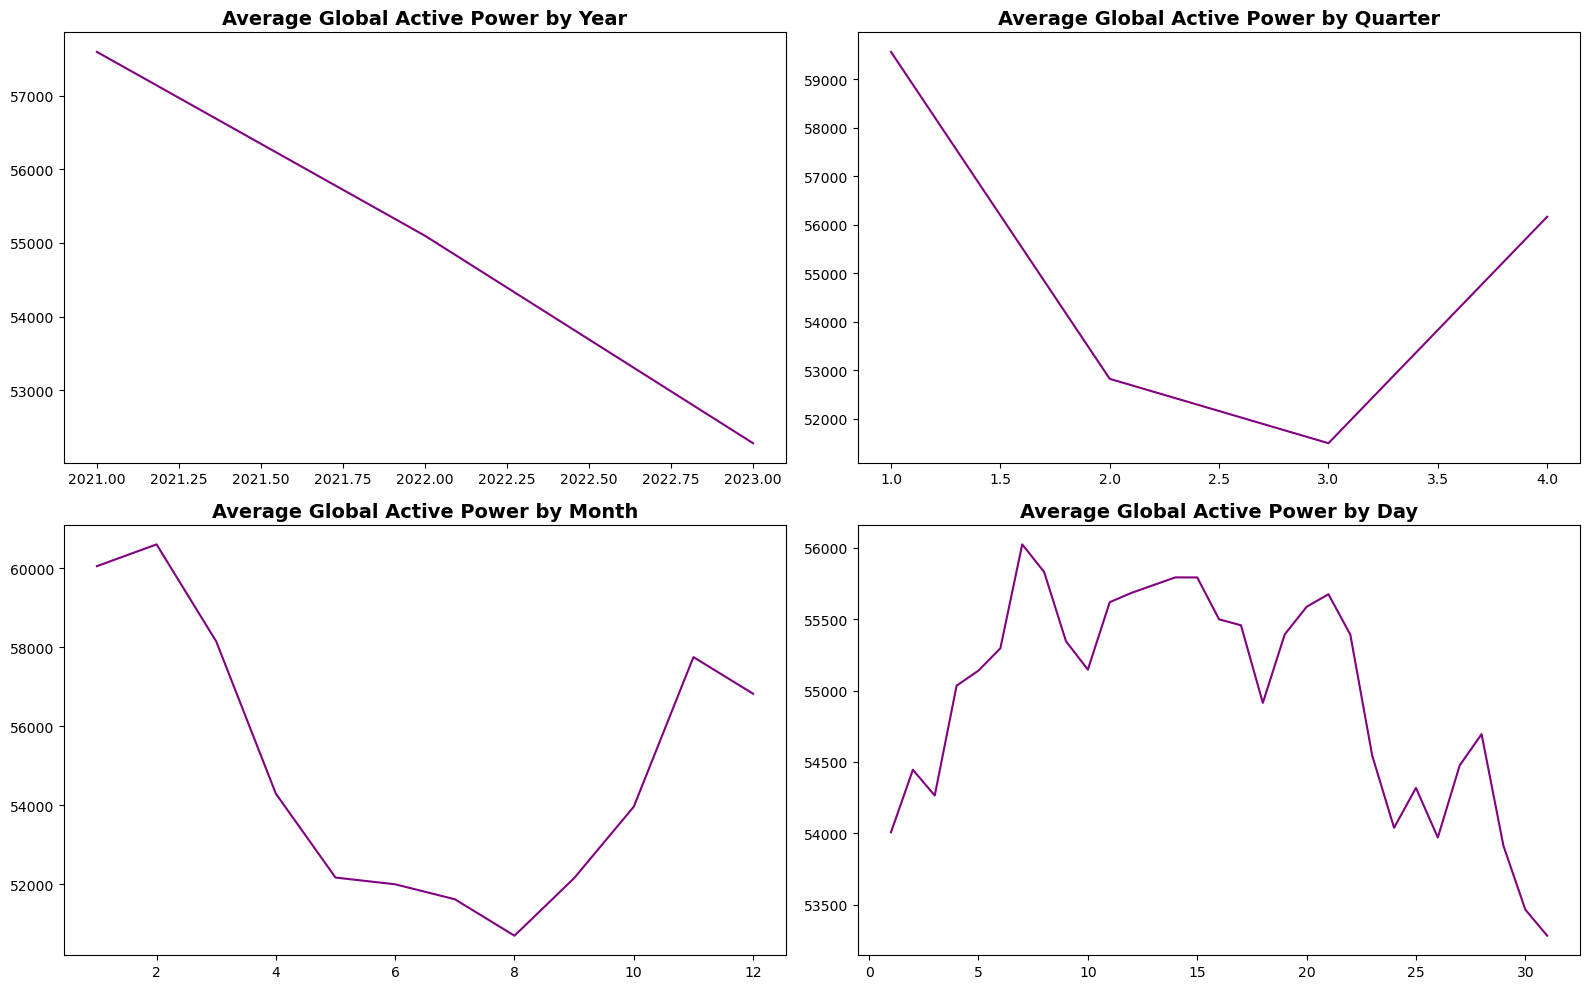

In [165]:
# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = df.groupby('year').Value.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = df.groupby('quarter').Value.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')


# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = df.groupby('month').Value.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = df.groupby('day').Value.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

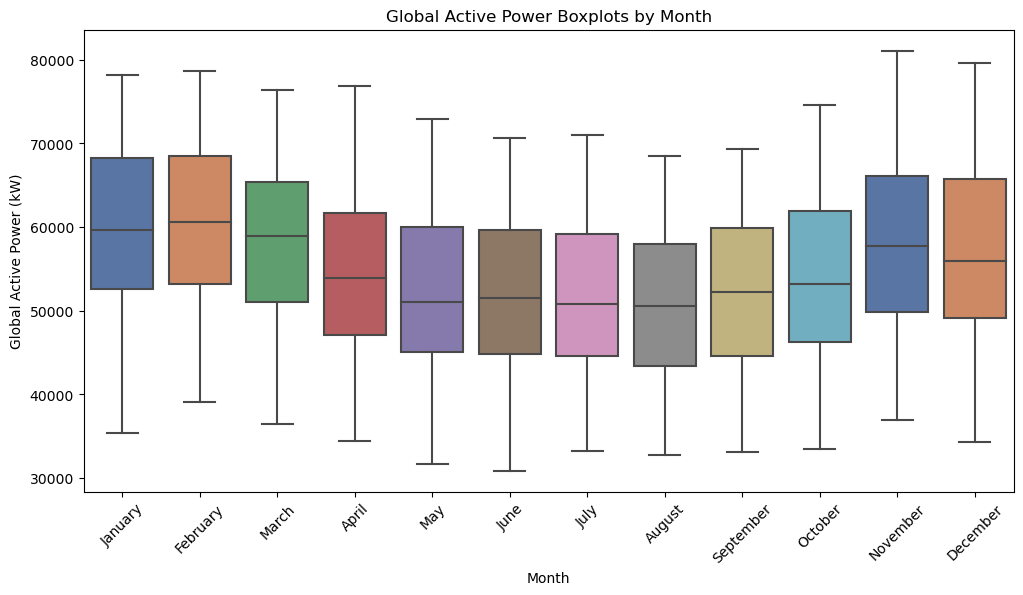

In [170]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='month', y='Value', palette='deep')
plt.title('Global Active Power Boxplots by Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kW)')
plt.xticks(range(12), calendar.month_name[1:13], rotation=45)
plt.show()

In [173]:
## Monthly and quarterly data
# Resample by month and calculate the mean
monthly_mean = df['Value'].resample(rule='M').mean()

# Resample by quarter and calculate the mean
quarterly_mean = df['Value'].resample(rule='Q').mean()

plt.figure(figsize=(12,6))
# pandas plot
monthly_mean.plot(label='Monthly', marker='.')
# pandas plot
quarterly_mean.plot(label='Quarterly', marker='.')

plt.title('Average Global Active Power - Monthly and Quarterly')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [5]:
# Get the maximum and minimum values of column 'A'
max_value_A = df['Value'].max()
min_value_A = df['Value'].min()


print(f"Maximum value of column 'A': {max_value_A}")
print(f"Minimum value of column 'A': {min_value_A}")


Maximum value of column 'A': 81077.455
Minimum value of column 'A': 30908.88


In [7]:
df.shape

(26280, 4)

In [8]:
df1=df

In [9]:
df1['datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

In [10]:
df1.head()

,Date,Time,CountryCode,Value,datetime
0,2021-01-01,00:00:00,DE,42832.3525,2021-01-01 00:00:00
1,2021-01-01,01:00:00,DE,41111.0725,2021-01-01 01:00:00
2,2021-01-01,02:00:00,DE,40364.5550,2021-01-01 02:00:00
3,2021-01-01,03:00:00,DE,40318.0775,2021-01-01 03:00:00
4,2021-01-01,04:00:00,DE,39641.9450,2021-01-01 04:00:00


In [16]:
df1.head()

,Date,Time,CountryCode,Value
datetime,,,,
2021-01-01 00:00:00,2021-01-01,00:00:00,DE,42832.3525
2021-01-01 01:00:00,2021-01-01,01:00:00,DE,41111.0725
2021-01-01 02:00:00,2021-01-01,02:00:00,DE,40364.5550
2021-01-01 03:00:00,2021-01-01,03:00:00,DE,40318.0775
2021-01-01 04:00:00,2021-01-01,04:00:00,DE,39641.9450


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame and 'datetime_column' is the name of your datetime column
# Convert datetime_column to datetime if it's not already in datetime format
df1['dates'] = pd.to_datetime(df1['datetime'])

# Set datetime_column as the index of the DataFrame
df1.set_index('datetime', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df1['Value'], model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df['Value'])
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


KeyError: 'datetime'